# Probability Distributions

[Source](https://www.youtube.com/watch?v=uial-2girHQ&t=38s)

## Uniform Distribution

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
uniform_data = stats.uniform.rvs(size=int(10e5), # Size of array
                                 loc = 0,        # From 0
                                 scale=10)       # To 10


In [3]:
uniform_data

array([3.16915252, 1.77986686, 6.76056547, ..., 0.12423318, 0.25100392,
       1.28110313])

In [4]:
stats.uniform.rvs?

Signature: stats.uniform.rvs(*args, **kwds)
Docstring:
Random variates of given type.

Parameters
----------
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).
scale : array_like, optional
    Scale parameter (default=1).
size : int or tuple of ints, optional
    Defining number of random variates (default is 1).
random_state : {None, int, `numpy.random.Generator`,
                `numpy.random.RandomState`}, optional

    If `random_state` is None (or `np.random`), the
    `numpy.random.RandomState` singleton is used.
    If `random_state` is an int, a new ``RandomState`` instance is
    used, seeded with `random_state`.
    If `random_state` is already a ``Generator`` or ``RandomState``
    instance, that instance is used.

Returns
-------
rvs : ndarray or scalar
    Random variates of given `size`.
File:      ~/.config/anacond

### Normal Distribution Density Plot

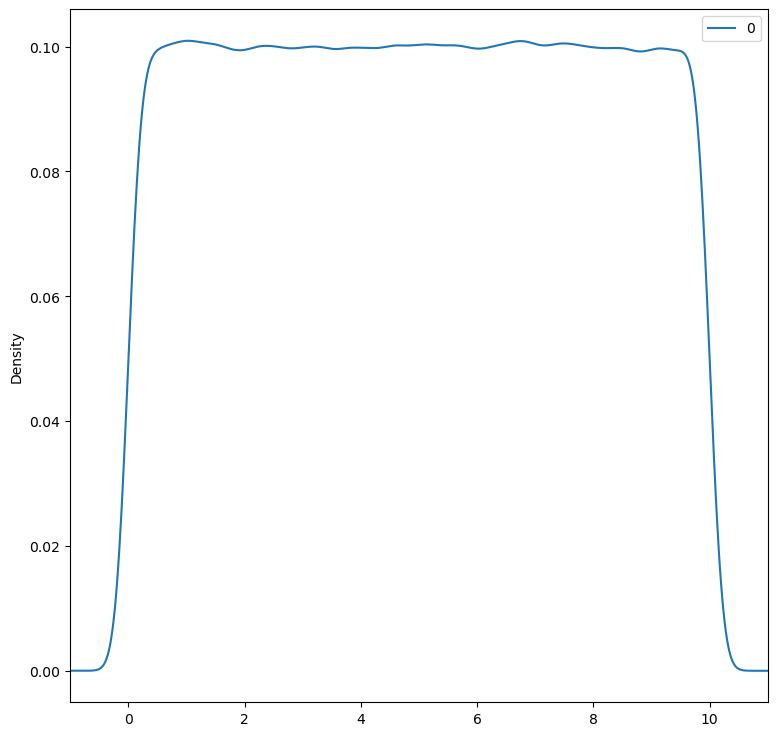

In [5]:
pd.DataFrame(uniform_data).plot(kind="density",
                                figsize=(9,9),
                                xlim=(-1,11));

## Cumulative Distribution Function

In [6]:
stats.uniform.cdf(x=2.5,        # Cutoff value (quantile) to check
                  loc=0,        # Distribution start
                  scale=10)     # Distribution end

0.25

25% probability

In [7]:
stats.uniform.cdf?

Signature: stats.uniform.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      ~/.config/anaconda3/envs/data/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method

## PPF 

returns x cutoff value (quantile) for given probability 

In [8]:
stats.uniform.ppf(q=0.25,
                  loc=0,
                  scale=10)

2.5

In [9]:
stats.uniform.ppf(q=0.4,
                  loc=0,
                  scale=10)

4.0

## Probability Distribution Function

In [10]:
for x in range(-1,12,3):
    print(f'Density at x value: {str(x)}')
    print(stats.uniform.pdf(x, loc=0, scale=10))

Density at x value: -1
0.0
Density at x value: 2
0.1
Density at x value: 5
0.1
Density at x value: 8
0.1
Density at x value: 11
0.0


All numbers within the range have the same probability density for the normal distribution

## Random Number Generation

**Random integers in a range**

In [11]:
import random

random.randint(0,10)

10

**Random real number in a range**

In [12]:
random.uniform(0,10)

9.094654569167478

**Random choice from a list**

In [13]:
choices = [5,2,6,1,8,9]
random.choice(choices)

2

**Real number between 0 and 1**

In [14]:
random.random()

0.06532151239638029

**Random seed**

In [15]:
random.seed(12)
print([random.uniform(0,10) for _ in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


In [16]:
print([random.uniform(0,10) for _ in range(4)])

[0.1086044309006795, 3.7475449206336444, 2.740481394783314, 8.103480522350837]


In [17]:
random.seed(12)
print([random.uniform(0,10) for _ in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


**Note for numpy and related, must use np.random.seed**

In [18]:
import numpy as np
np.random.seed(12)

# Normal Distribution

In [19]:
prob_under_minus1 = stats.norm.cdf(x=-1, loc=0, scale=1)
prob_under_minus1

0.15865525393145707

In [20]:
prob_over_1 = 1 - stats.norm.cdf(x=1, loc=0, scale=1)
prob_over_1

0.15865525393145707

In [21]:
prob_between = 1 - (prob_under_minus1 + prob_over_1)
prob_between

0.6826894921370859

In [22]:
prob_under_zero = stats.norm.cdf(x=0, loc=0, scale=1)
prob_under_plus1 = stats.norm.cdf(x=1, loc=0, scale=1)
print(abs(prob_under_minus1 - prob_under_zero))
print(abs(prob_under_plus1 - prob_under_zero))

0.3413447460685429
0.3413447460685429


In [23]:
plt.rcParams["figure.figsize"] = (7,7)

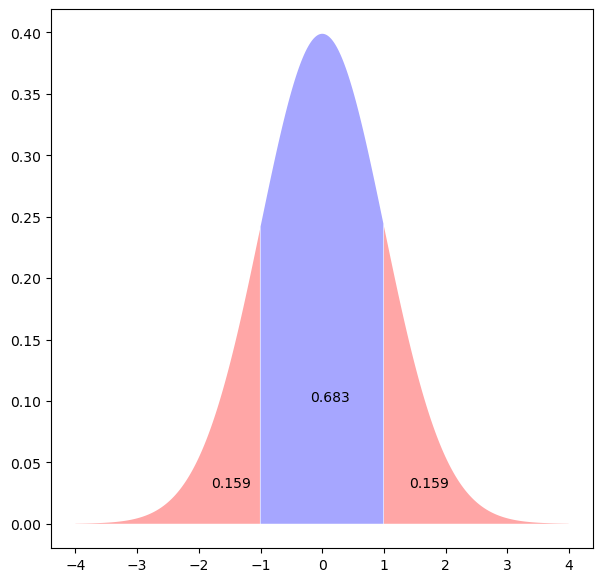

In [24]:
plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1=stats.norm.pdf(np.arange(-4,-1,0.01)),
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1=stats.norm.pdf(np.arange(1,4,0.01)),
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1=stats.norm.pdf(np.arange(-1, 1,0.01)),
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s=round(prob_under_minus1, 3))
plt.text(x=-0.2, y=0.1, s=round(prob_between, 3))
plt.text(x=1.4, y=0.03, s=round(prob_over_1, 3));

In [25]:
stats.norm.ppf(q = 0.01)

-2.3263478740408408

In [26]:
stats.norm.cdf(x=-1)

0.15865525393145707

In [27]:
1-stats.norm.cdf(x=-1)

0.8413447460685429

In [28]:
stats.norm.cdf(x=-3)

0.0013498980316300933

# Binomial Distribution

Discrete probability distribution, models outcomes of a given number of random events.

Characterized by the probability of success for a trial and the number of trials.

In [29]:
fair_coin_flips = stats.binom.rvs(n=10,
                                  p=0.5,
                                  size=10000)
fair_coin_flips

array([3, 6, 4, ..., 7, 4, 7])

In [30]:
len(fair_coin_flips)

10000

In [31]:
pd.crosstab(index='counts', columns=fair_coin_flips)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
counts,10,83,420,1188,2140,2451,2004,1162,431,96,15


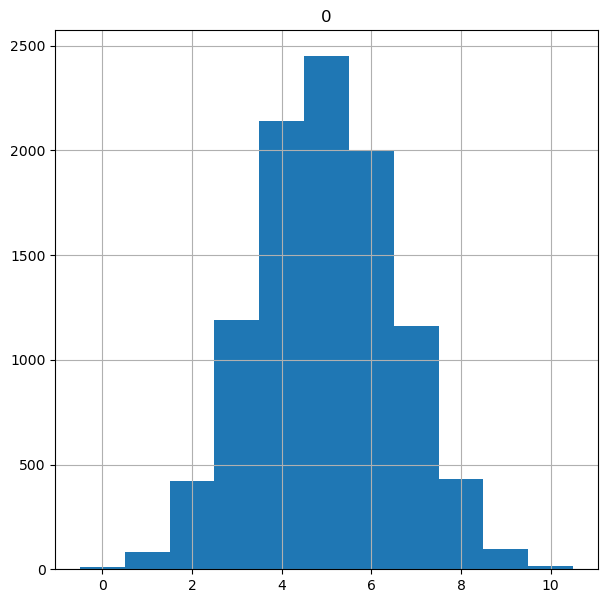

In [32]:
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   4  50  272  920  2059  2933  2705  1056


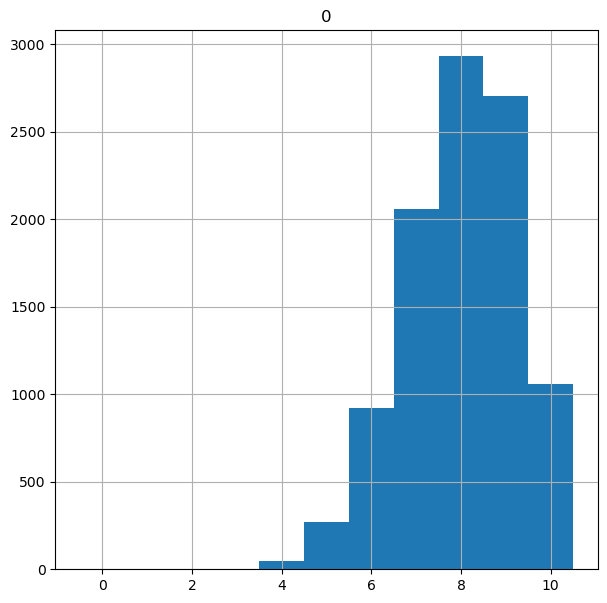

In [33]:
biased_coin_flips = stats.binom.rvs(n=10, p=0.8, size=10000)
print(pd.crosstab(index='counts', columns=biased_coin_flips))
pd.DataFrame(biased_coin_flips).hist(range=(-0.5, 10.5), bins=11);

## Cumulative Distribution

In [34]:
stats.binom.cdf(k=5, n=10, p=0.8)

0.03279349759999997

In [35]:
stats.binom.cdf(k=8, n=10, p=0.8)

0.6241903615999999

In [36]:
stats.binom.cdf(k=9, n=10, p=0.8)

0.8926258176

In [37]:
over_8 = 1-stats.binom.cdf(k=8, n=10, p=0.8)

In [38]:
under_8 = stats.binom.cdf(k=7, n=10, p=0.8)

In [39]:
eight = stats.binom.cdf(k=8, n=10, p=0.8) - stats.binom.cdf(k=7, n=10, p=0.8)

In [40]:
eight + over_8 + under_8

1.0

## Probability Mass Function

Probability density for discrete variables, gives proportion of observations at a given number of successes.

In [41]:
stats.binom.pmf(k=5, n=10, p=0.5) # Probability of exactly 5 successes with 10 flips, 50% prob

0.24609375000000003

In [42]:
stats.binom.pmf(k=8, n=10, p=0.5)

0.04394531250000004

In [43]:
for k in range(10):
    print(stats.binom.pmf(k=k, n=10, p=0.5))

0.0009765624999999989
0.009765625000000002
0.04394531250000004
0.1171875
0.2050781249999999
0.24609375000000003
0.2050781249999999
0.11718749999999999
0.04394531250000004
0.009765625000000002


# Geometric and Exponential Distributions

Models the time necessary for an event to occur.

Geometric is discrete, modeling number of trials to achieve success in repeated experiments.
Exponential is continuous, amount of time to wait given an occurrence rate.

In [44]:
random.seed(12)
flips_till_heads = stats.geom.rvs(size=10000,
                                  p=0.5)
flips_till_heads

array([3, 1, 1, ..., 2, 2, 2])

In [45]:
print(pd.crosstab(index='counts', columns=flips_till_heads))

col_0     1     2     3    4    5    6   7   8   9   10  11  12  14  15
row_0                                                                  
counts  4977  2559  1250  610  300  149  79  32  27   8   4   3   1   1


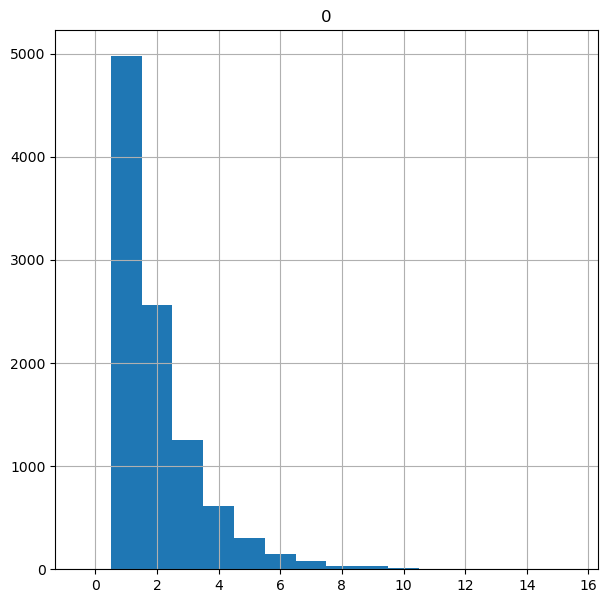

In [46]:
pd.DataFrame(flips_till_heads).hist(range=(-0.5, 
                                           max(flips_till_heads)+0.5),
                                                bins=max(flips_till_heads)+1);

### CDF - probability of needing k flips or more to get success

In [48]:
first_five = stats.geom.cdf(k=5, p=0.5) # Probability of success within 5
first_five

0.96875

In [49]:
1 - first_five # probability of needing more than five

0.03125

In [50]:
stats.geom.cdf(k=6, p=0.5) - first_five

0.015625

### PMF for exact numbers

In [51]:
stats.geom.pmf(k=6, p=0.5)

0.015625

## Exponential - time units until success

cdf - Probability of waiting more than 1 time unit before success

In [54]:
prob_1 = stats.expon.cdf(x=1, scale=1) # Scale is arrival rate
prob_1

0.6321205588285577

In [55]:
1 - prob_1  # longer than

0.36787944117144233

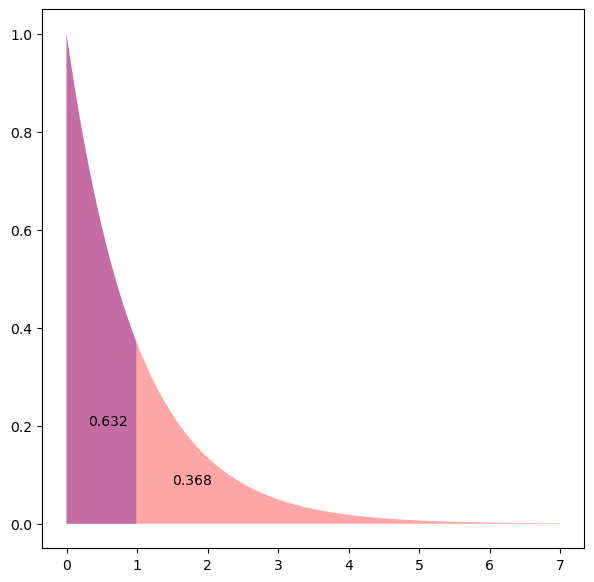

In [56]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1=stats.expon.pdf(np.arange(0,1,0.01)),
                 facecolor="blue",
                 alpha=0.35)

plt.fill_between(x=np.arange(0,7,0.01),
                 y1=stats.expon.pdf(np.arange(0,7,0.01)),
                 facecolor="red",
                 alpha=0.35)

plt.text(x=0.3, y=0.2, s=round(prob_1,3))
plt.text(x=1.5, y=0.08, s=round(1 - prob_1,3));


# Poisson Distribution

Probability of seeing a certain number of successes within a time interval, where time for the next success if modeled by an exponential distribution.

Complement of the Exponential

EG. number of arrivals in an hour

In [73]:
np.random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,
                                   mu=1)        # Average arrival time
arrival_rate_1

array([0, 1, 1, ..., 0, 1, 1])

In [74]:
print(pd.crosstab(index='counts', columns=arrival_rate_1))

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3705  3666  1816  632  147  29  5


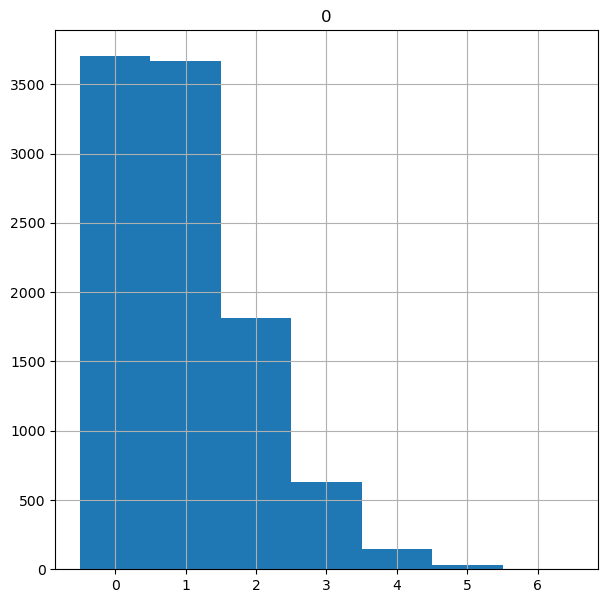

In [76]:
pd.DataFrame(arrival_rate_1).hist(range=(-0.5, max(arrival_rate_1)+0.5),
                                  bins=max(arrival_rate_1)+1);

A good likelihood of 2-4 clients in the first hour

col_0   0   1   2   3    4    5    6    7     8     9   ...   15   16   17  \
row_0                                                   ...                  
counts   1   2  17  56  157  445  607  979  1088  1228  ...  358  198  122   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  77  42  17   8   2   3   1  

[1 rows x 25 columns]


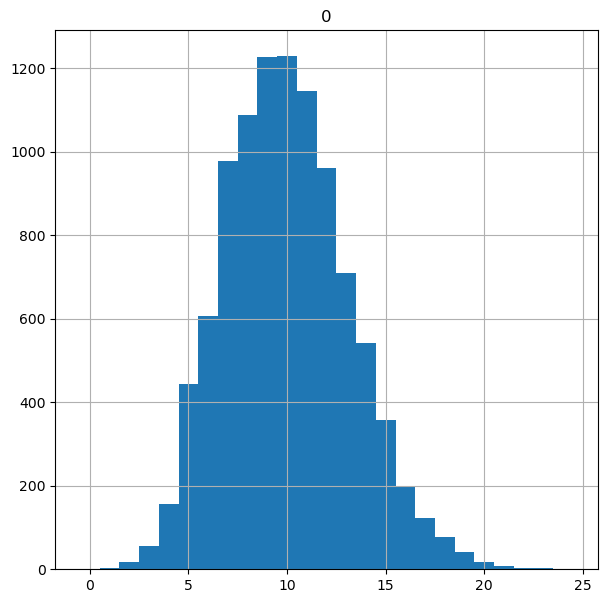

In [77]:
np.random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,
                                   mu=10)        # Average arrival time

print(pd.crosstab(index='counts', columns=arrival_rate_10))

pd.DataFrame(arrival_rate_10).hist(range=(-0.5, max(arrival_rate_10)+0.5),
                                  bins=max(arrival_rate_10)+1);